# project title

<div class="alert alert-info"> <b>

    Online Store Data

# Project description

<div class="alert alert-info"> <b>

    we have three datasets of  users in big online store. there is a compiled a list of hypotheses that may help boost revenue.will prioritize these hypotheses, launch an A/B test, and analyze the results to give some recommandations that may help the marketing department to boost the revenue of the company.

In [1]:
#import libraries
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats as st
import seaborn as sns
from functools import reduce
import datetime as dt
from pandas.plotting import scatter_matrix
import warnings
from operator import attrgetter
import matplotlib.colors as mcolors
from IPython.display import Image
from IPython.core.display import HTML
import plotly.express as px
import plotly.graph_objects as go
import math
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')
warnings.simplefilter(action='ignore', category = FutureWarning)

In [2]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [3]:
# samples of datasets
hypotheses.head()
orders.head()
visits.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-info"> <b>

    in hypotheses dataset the columns need to be written again with lowercase
    in the orders dataset some columns need to be fixed.

In [4]:
# info
hypotheses.info()
print()
orders.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (to

<div class="alert alert-info"> <b>

    there is no missing values, the data looks good for now.

In [5]:
# fixing datasets columns issues
hypotheses = hypotheses.rename(str.lower,axis='columns')
orders = orders.rename(columns= {'transactionId': 'transiction_id', 
                                 'visitorId': 'visitors_id'})
orders['date'] = pd.to_datetime(orders['date'])


In [6]:
# samples
pd.options.display.max_colwidth = 200

hypotheses
orders.head()
visits.head()


,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


,transiction_id,visitors_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-info"> <b>
    
    here I printed the hypotheses right below the hypothesis table so the hypothesis details will be clear to read.

In [7]:
# info about the dataframes
hypotheses.describe()
orders.describe()
visits.describe()

,reach,impact,confidence,effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


,transiction_id,visitors_id,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


# **orders dataset**

In [8]:
# deleting users who appears in both groups A and B
a_orders = orders.query('group == "A"')
b_orders = orders.query('group == "B"')
two_groups = pd.merge(a_orders, b_orders, how='inner', on=['visitors_id'])
print('number of users appears in both groups:', pd.Series(len(two_groups)))
unique_unwanted = two_groups['visitors_id'].nunique()
unwanted_users = two_groups['visitors_id']
print('unique number of such users:', unique_unwanted)

number of users appears in both groups: 0    183
dtype: int64
unique number of such users: 58


<div class="alert alert-info"> <b>
    
    I added the number of unique users for the unwanted data frame, if I undertood right.

<div class="alert alert-info"> <b>

    we can see that there are 183 users who are appearing in both groups A and B. will use a copy of the original dataframe without these users so the calculations would be more spicific.

<div class="alert alert-info"> <b>

    we can see that there are 183 users who are appearing in both groups A and B. will use a copy of the original dataframe without these users so the calculations would be more spicific.

In [9]:
#getting data only with users who appears one time in groups not in both
all_orders = orders.copy()
# orders = orders[~orders['visitors_id'].isin(unwanted_users)]

all_orders.info()
print()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transiction_id  1197 non-null   int64         
 1   visitors_id     1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transiction_id  1197 non-null   int64         
 1   visitors_id     1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   float64       
 4   group           1197 non

# **visits dataset**

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(array([ 4.,  4.,  1.,  6.,  5.,  5.,  9.,  9., 12.,  7.]),
 array([361. , 401.9, 442.8, 483.7, 524.6, 565.5, 606.4, 647.3, 688.2,
        729.1, 770. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Number of visits')

Text(0.5, 0, 'num of visits')

Text(0, 0.5, 'visits')

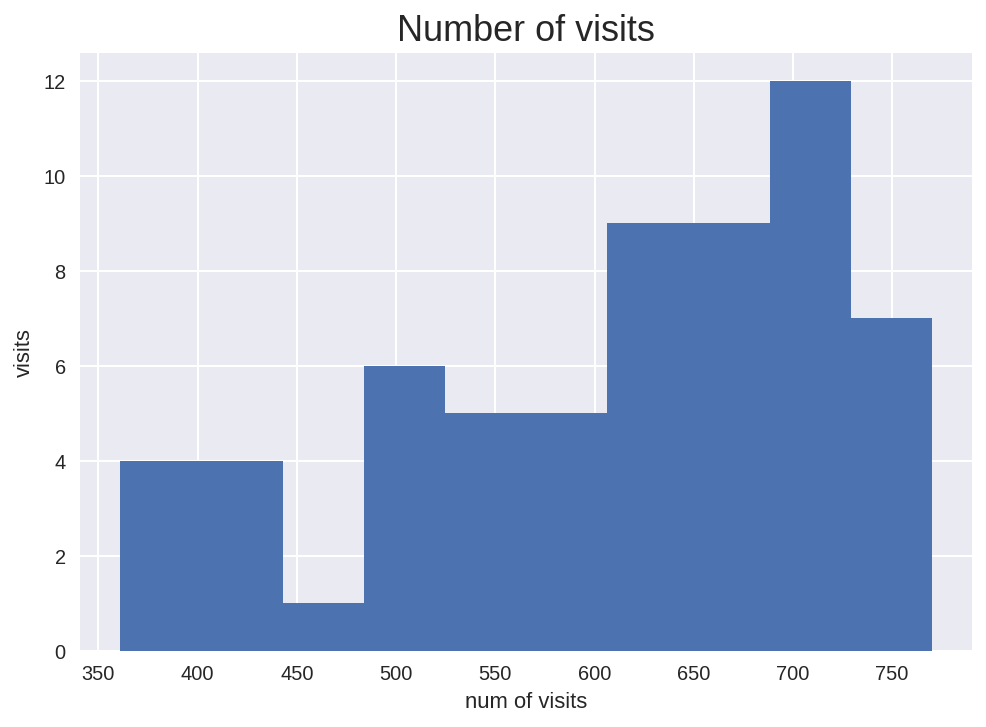

Text(0.5, 1.0, 'Number of visits')

Text(0.5, 0, 'num of visits')

Text(0, 0.5, 'visits')

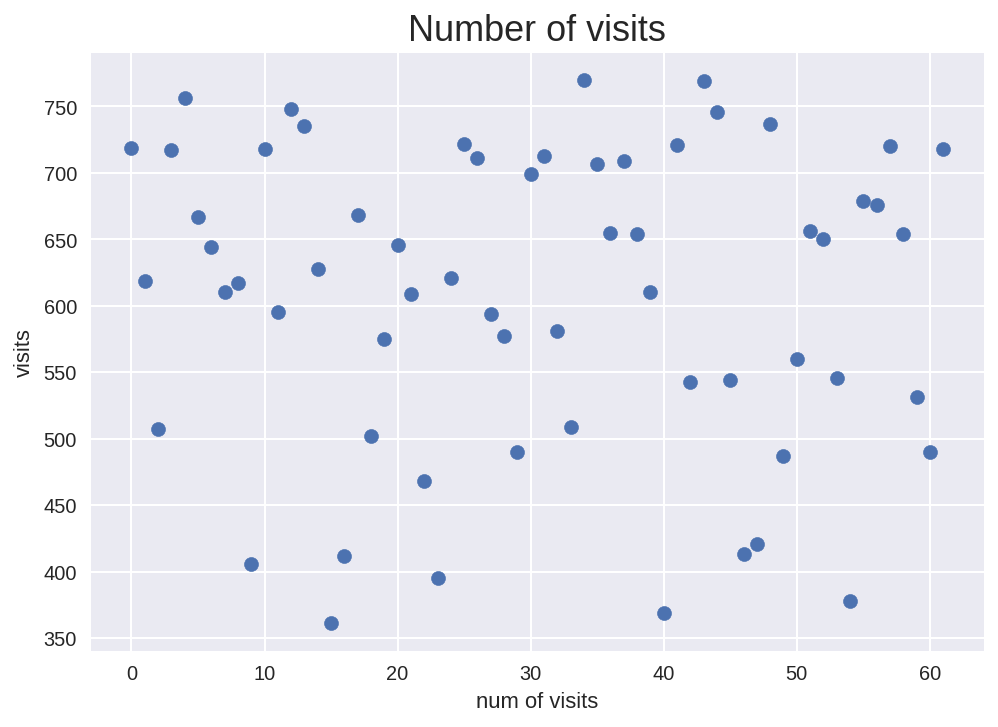

In [11]:
# plotting a visits histogram
plt.hist(visits['visits'])
plt.title('Number of visits', fontsize=18)
plt.xlabel('num of visits')
plt.ylabel('visits')
plt.show()

# fig, ax = plt.subplots(figsize=(15,10))
# fig = px.histogram(visits, x='visits')
# fig.show()

#scatter values
x_values = pd.Series(range(0, len(visits['visits'])))
plt.scatter(x_values, visits['visits'])
plt.title('Number of visits', fontsize=18)
plt.xlabel('num of visits')
plt.ylabel('visits')
plt.show()

In [12]:
# making sure that every date in the dataset has two values (A and B group)
visits['date'].value_counts()

2019-08-26    2
2019-08-05    2
2019-08-14    2
2019-08-25    2
2019-08-15    2
2019-08-29    2
2019-08-18    2
2019-08-30    2
2019-08-28    2
2019-08-19    2
2019-08-06    2
2019-08-16    2
2019-08-22    2
2019-08-11    2
2019-08-21    2
2019-08-09    2
2019-08-31    2
2019-08-07    2
2019-08-08    2
2019-08-10    2
2019-08-17    2
2019-08-20    2
2019-08-13    2
2019-08-04    2
2019-08-12    2
2019-08-02    2
2019-08-24    2
2019-08-03    2
2019-08-27    2
2019-08-23    2
2019-08-01    2
Name: date, dtype: int64

# **Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [13]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [15]:
# adding ICE column calculate to hypotheses
hypotheses['ICE'] = (hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses = hypotheses.sort_values(by=['ICE'], ascending=False)
hypotheses
pd.options.display.float_format = '{:,.1f}'.format
# style.format({'ICE': '{:.1f}'})

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0


<div class="alert alert-info"> <b>

    ICE gives an indecation that hypotheses 8, 0, 7 and 6 are the most promising hypotheses.

# **Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.**

In [16]:
# adding RICE to hypotheses
hypotheses['RICE'] = (hypotheses['reach']*hypotheses['impact']*hypotheses['confidence'])/hypotheses['effort']
hypotheses = hypotheses.sort_values(by=['RICE'], ascending=False)
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


<div class="alert alert-info"> <b>

        RICE gives an indecation that hypotheses 7, 2, 0 and 6 are the most promising hypotheses.

# Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.

In [17]:
hypotheses

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


<div class="alert alert-info"> <b>

    ICE will be good if our main goal is to reach out people who are using the product, this will be the impact itself. while RICE takes into account both reach and impact.
    For an online store its better to prioritize RICE.

# Part 2. A/B Test Analysis

# Graph cumulative revenue by group. Make conclusions and conjectures.

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'cumulative revenues by groups')

Text(0.5, 0, 'date')

Text(0, 0.5, 'revenue cumulative')

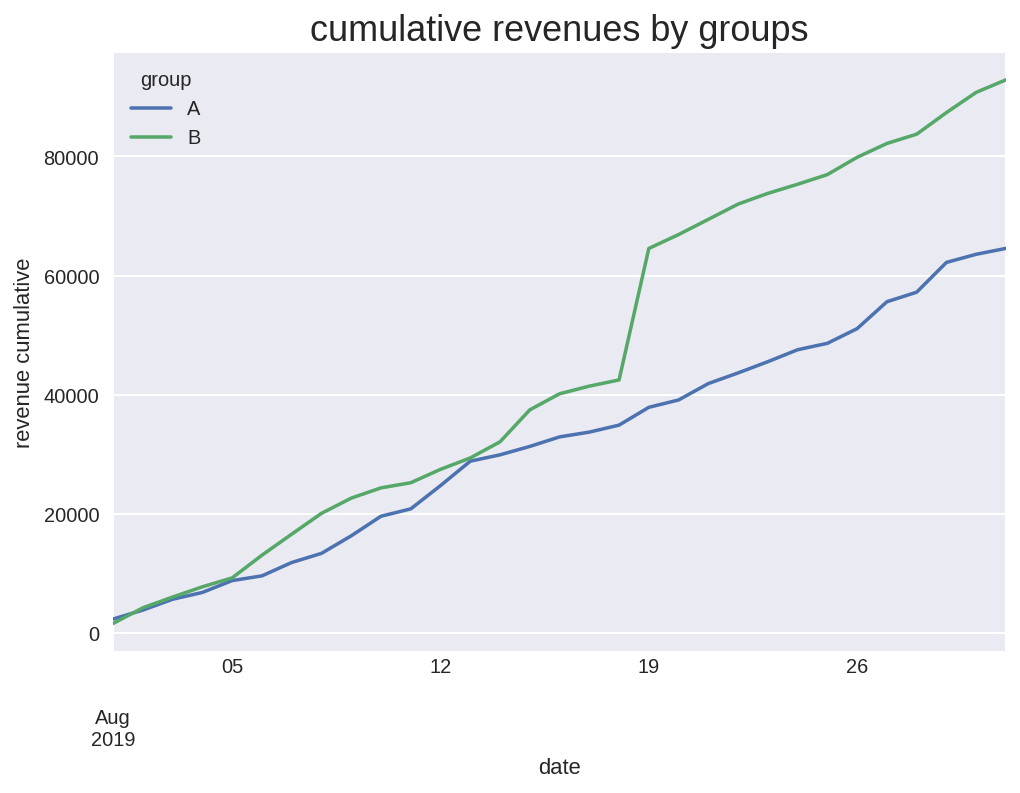

In [18]:
#pivot for revenue by groups
revenues_by_groups = pd.pivot_table(orders, values='revenue', index='date', columns='group', aggfunc=np.sum)
cumulative_revenues_by_groups = revenues_by_groups.cumsum()
#plot
cumulative_revenues_by_groups.plot()
plt.title('cumulative revenues by groups', fontsize=18)
plt.xlabel('date')
plt.ylabel('revenue cumulative')
plt.show()

<div class="alert alert-info"> <b>

    the revenue for both groups A and B was increasing at the beggining untill the half of the period.
    it's a good sign for the hypotheses that both group's revenues are increasing forward with the time, but after half way group B starts to increase much more than group A.

# Graph cumulative average order size by group. Make conclusions and conjectures.

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'average order size by groups')

Text(0.5, 0, 'date')

Text(0, 0.5, 'revenue average')

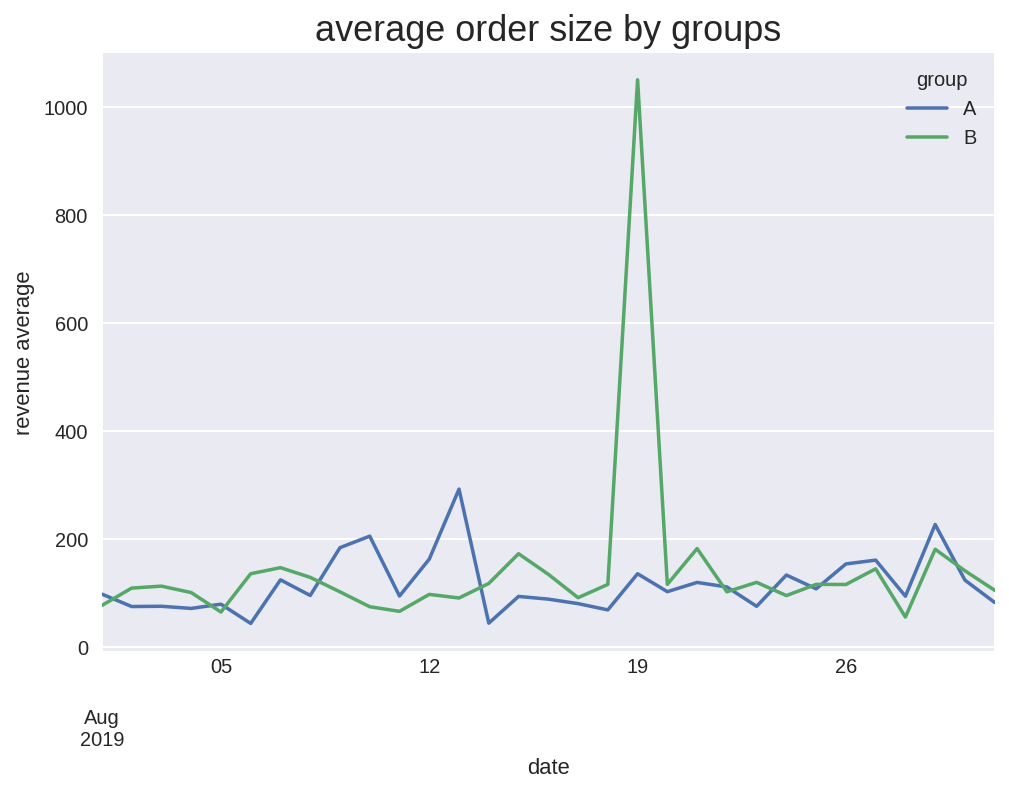

In [19]:
#pivot for revenue by groups
average_order_size_groups = pd.pivot_table(orders, values='revenue', index='date', columns='group', aggfunc=np.average)
# cumulative_revenues_by_groups = revenues_by_groups.cumsum()
#plot
average_order_size_groups.plot()
plt.title('average order size by groups', fontsize=18)
plt.xlabel('date')
plt.ylabel('revenue average')
plt.show()

In [20]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [21]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,"2,356.8",719
1,2019-08-01,B,21,20,"1,620.0",713
2,2019-08-02,A,44,38,"3,860.3",1338
3,2019-08-02,B,45,43,"4,243.8",1294
4,2019-08-03,A,68,62,"5,675.5",1845


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Cumulative average order size')

Text(0.5, 0, 'date')

Text(0, 0.5, 'revenue cumulative')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

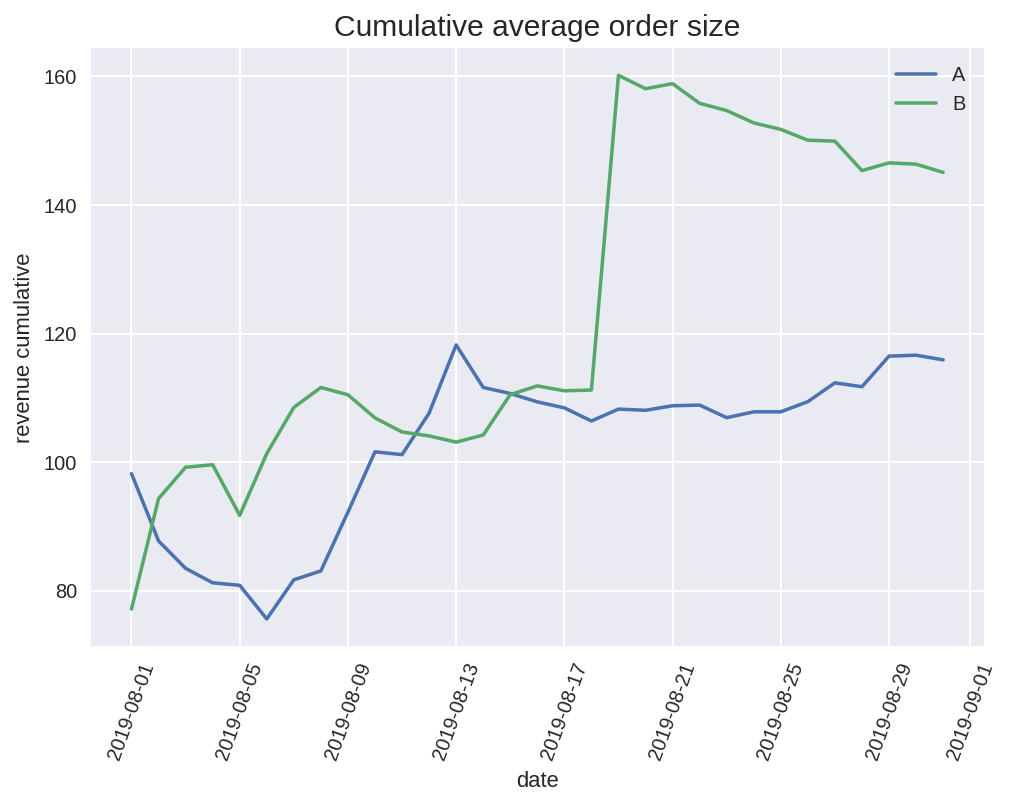

In [22]:
# corrections after review
dates_groups = orders[['date', 'group']].drop_duplicates()
visits['date'] = pd.to_datetime(visits['date'])
agg_orders = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transiction_id' : pd.Series.nunique, 'visitors_id': pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date', 'group'])
agg_visits = dates_groups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulative_data = agg_orders.merge(agg_visits, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data.head()

#groups
cumulative_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]
cumulative_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

#plotting new graph
plt.plot(cumulative_a['date'], cumulative_a['revenue'] / cumulative_a['orders'], label='A')
plt.plot(cumulative_b['date'], cumulative_b['revenue'] / cumulative_b['orders'], label='B')
plt.xticks(rotation=70)
plt.title('Cumulative average order size', fontsize=15)
plt.xlabel('date')
plt.ylabel('revenue cumulative')
plt.xticks(rotation=70)
plt.legend()
plt.show()

<div class="alert alert-info"> <b>

    we can see a plot for the average purchase size of the orders since the test started, the averge size for both orders is not stable along the test but its keeps moving around the same range of values. 
    there were two clear peaks the first one for group A around 12 after the test started, the other peak is for group B around 19 days after the test started there was a huge peak, maybe because in the same week users placed orders with high prices than the usual orders in the store.

# Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.

In [23]:
# getting average revenues for both groups
average_order_size_groups = pd.DataFrame(average_order_size_groups.to_records())
average_order_size_groups.head()

,date,A,B
0,2019-08-01,98.2,77.1
1,2019-08-02,75.2,109.3
2,2019-08-03,75.6,112.9
3,2019-08-04,71.7,101.0
4,2019-08-05,79.5,65.0


In [24]:
# adding difference colum between two groups 
average_order_size_groups['revenue_difference'] = average_order_size_groups['B'] - average_order_size_groups['A']
average_order_size_groups.head()

,date,A,B,revenue_difference
0,2019-08-01,98.2,77.1,-21.1
1,2019-08-02,75.2,109.3,34.2
2,2019-08-03,75.6,112.9,37.3
3,2019-08-04,71.7,101.0,29.4
4,2019-08-05,79.5,65.0,-14.5


In [25]:
# counting transictions per day by two groups
orders_by_groups = pd.pivot_table(orders, values='transiction_id',
                                  index='date',
                                  columns='group',
                                  aggfunc = lambda x:len(x.unique()))
orders_by_groups = pd.DataFrame(orders_by_groups.to_records())
orders_by_groups.head()

,date,A,B
0,2019-08-01,24,21
1,2019-08-02,20,24
2,2019-08-03,24,16
3,2019-08-04,16,17
4,2019-08-05,25,23


0   -21.1
1    13.1
2    50.4
3    79.7
4    65.2
Name: revenue_difference, dtype: float64

Text(0.5, 1.0, 'Difference between two groups A and B in average order size')

Text(0.5, 0, 'dates')

Text(0, 0.5, 'difference between groups A&B in orders sizes')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

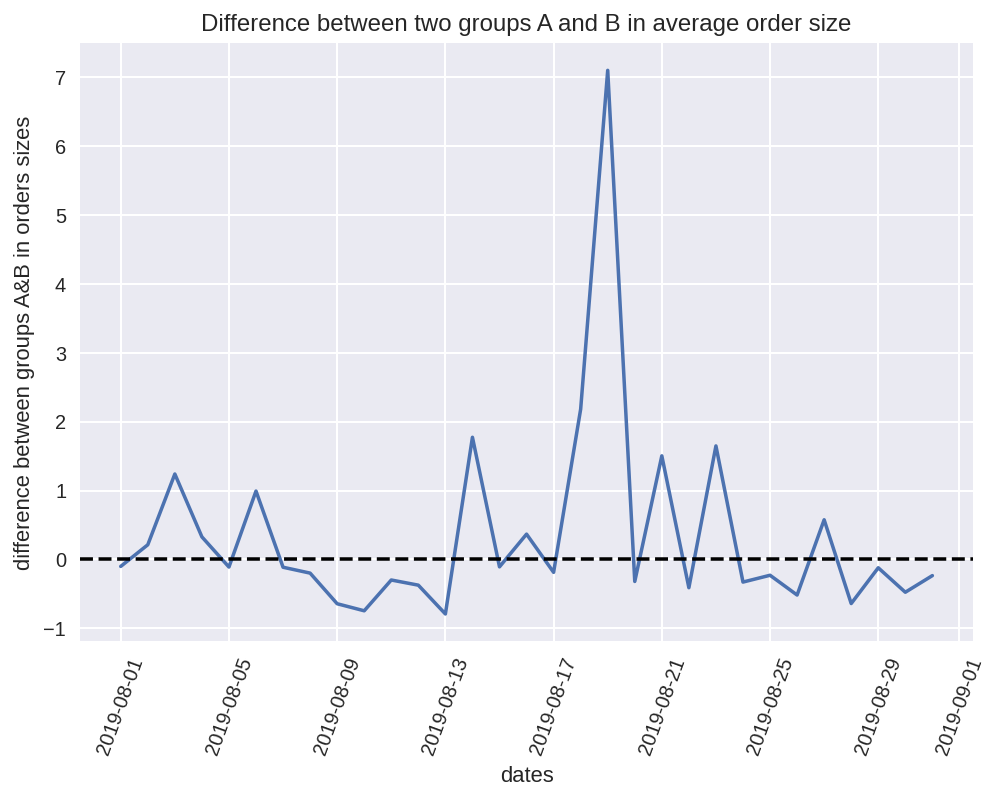

In [26]:
# plotting
difference_plot = average_order_size_groups.drop(['A', 'B'], axis=1)
difference_plot_cumsum = average_order_size_groups['revenue_difference'].cumsum()
difference_plot_cumsum.head()

plt.plot(average_order_size_groups['date'], (average_order_size_groups['B'] / orders_by_groups['B']) / (average_order_size_groups['A'] / orders_by_groups['A']) -1)
plt.title('Difference between two groups A and B in average order size')
plt.xlabel('dates')
plt.ylabel('difference between groups A&B in orders sizes')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation = 70)
plt.show()

**after review**

Text(0.5, 1.0, 'cummulative difference between groups')

Text(0.5, 0, 'dates')

Text(0, 0.5, 'cummulative difference')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

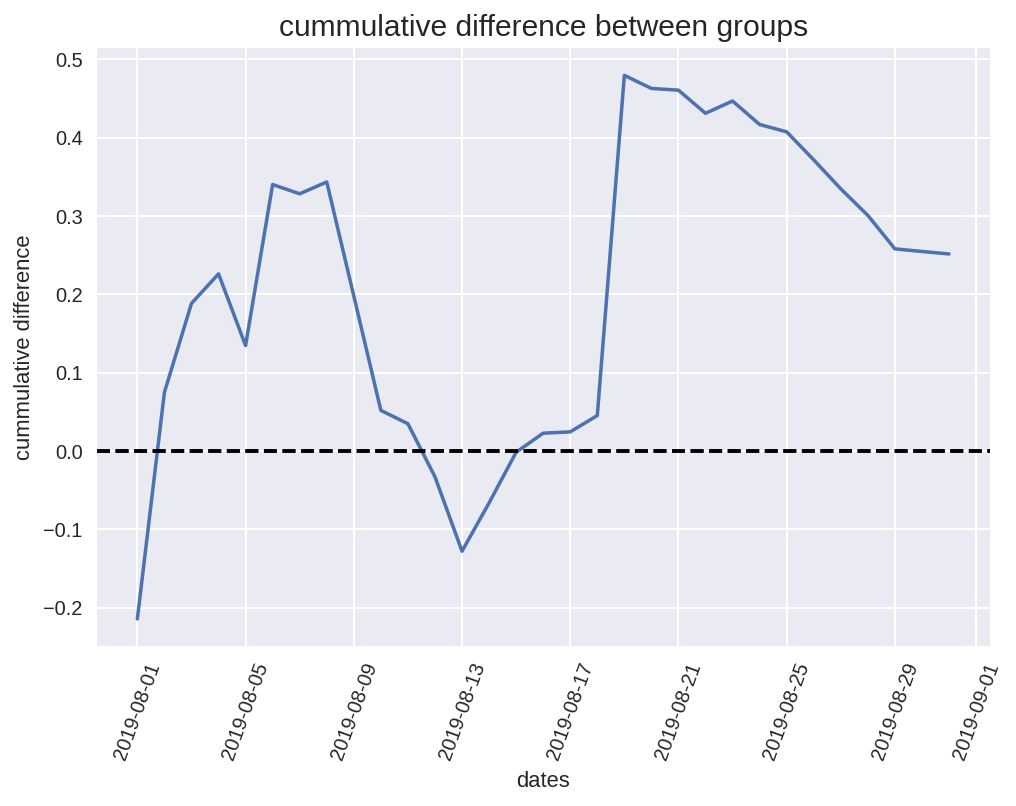

In [34]:
# merging groups
merged_a_and_b = cumulative_a.merge(cumulative_b, left_on='date', right_on='date', how='inner', suffixes=['A', 'B'])

#plot
plt.plot(merged_a_and_b['date'], (merged_a_and_b['revenueB'] / merged_a_and_b['ordersB']) /  (merged_a_and_b['revenueA'] / merged_a_and_b['ordersA']) -1)

# adding x axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('cummulative difference between groups', fontsize=15)
plt.xlabel('dates')
plt.ylabel('cummulative difference')
plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=70)
plt.show()

<div class="alert alert-info"> <b>

    it looks like there is some outliers, will try to deal with them later.
    but at most poins it looks like group B is higher than group A

**made corrections in previous calculations.**

# Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.

In [35]:
visits.head()
num_of_visits_bygrouop = pd.pivot_table(visits, values='visits', index='date', columns='group', aggfunc=np.sum)
num_of_visits_bygrouop = pd.DataFrame(num_of_visits_bygrouop.to_records())
num_of_visits_bygrouop.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,A,B
0,2019-08-01,719,713
1,2019-08-02,619,581
2,2019-08-03,507,509
3,2019-08-04,717,770
4,2019-08-05,756,707


In [36]:
# conversion rate by groups, average conversion
a_conversion = orders_by_groups['A'] / num_of_visits_bygrouop['A']
b_conversion = orders_by_groups['B'] / num_of_visits_bygrouop['B']
date = num_of_visits_bygrouop['date']

print('Conversion rate for group A is:')
a_conversion.head()
print('Conversion rate for group B is:')
b_conversion.head()

print('average conversion rate for group A is:')
statistics.mean(a_conversion)
print('average conversion rate for group B is:')
statistics.mean(b_conversion)

Conversion rate for group A is:


0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
Name: A, dtype: float64

Conversion rate for group B is:


0   0.0
1   0.0
2   0.0
3   0.0
4   0.0
Name: B, dtype: float64

average conversion rate for group A is:


0.030650668894803362

average conversion rate for group B is:


0.035257471713151245

In [37]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,"2,356.8",719
1,2019-08-01,B,21,20,"1,620.0",713
2,2019-08-02,A,44,38,"3,860.3",1338
3,2019-08-02,B,45,43,"4,243.8",1294
4,2019-08-03,A,68,62,"5,675.5",1845


(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'cumulative conversion by group and dates')

Text(0.5, 0, 'date')

Text(0, 0.5, 'conversion cumulative')

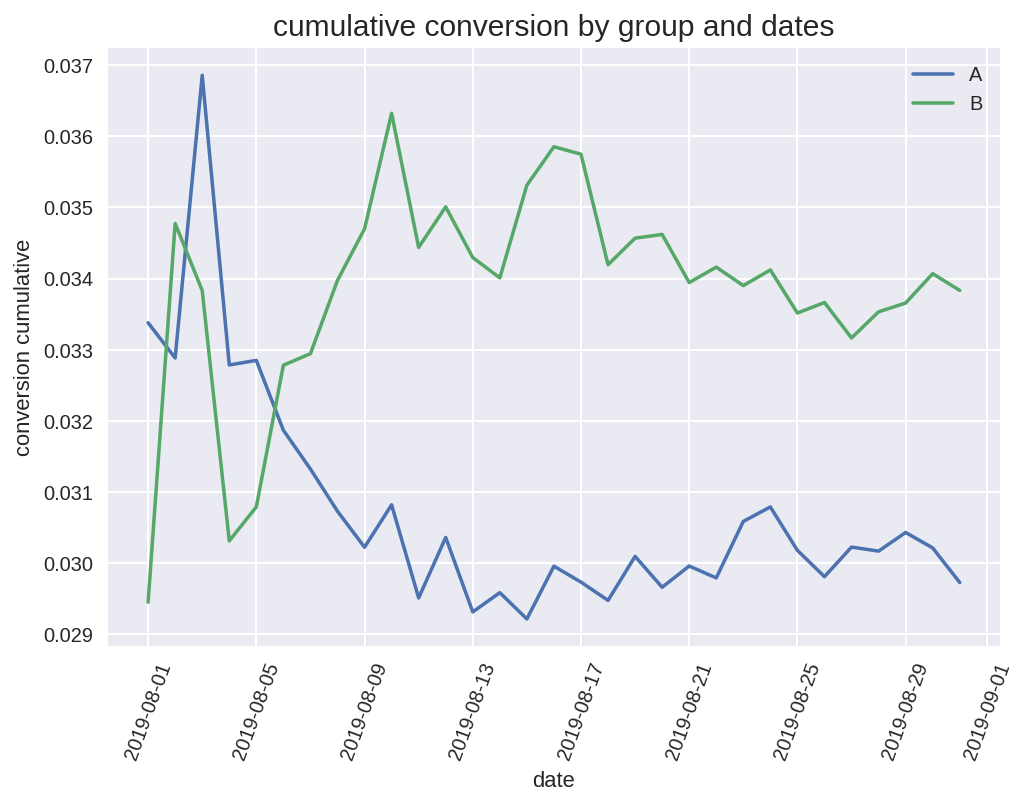

In [38]:
# corrections after review
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

# selecting groups
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

# plot
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xticks(rotation=70)
plt.title('cumulative conversion by group and dates', fontsize=15)
plt.xlabel('date')
plt.ylabel('conversion cumulative')
plt.legend()
plt.show()

<div class="alert alert-info"> <b>

    looks like the average conversion rate for group B is a little bit higher than average conversion rate in group A.

Text(0.5, 1.0, 'conversion rates by groups - dates')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

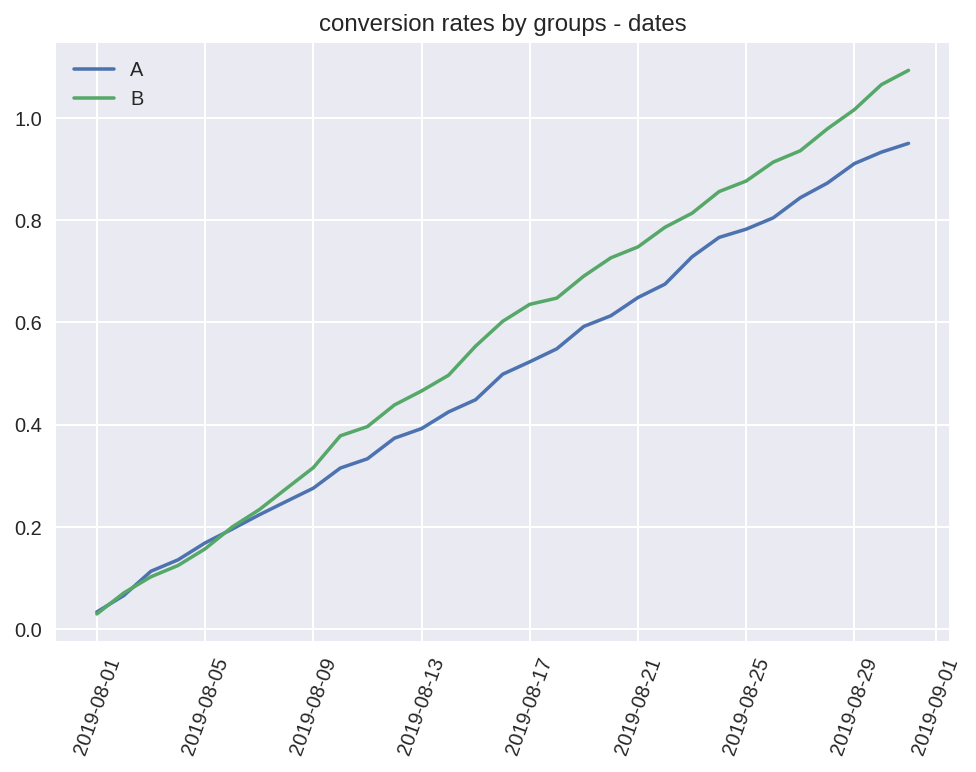

In [39]:
# cumulative conversion rate
a_conversion_cumsum = a_conversion.cumsum()
b_conversion_cumsum = b_conversion.cumsum()

# plotting graph
plt.plot(date, a_conversion_cumsum, label='A')
plt.plot(date, b_conversion_cumsum, label='B')
plt.legend()
plt.title('conversion rates by groups - dates')
plt.xlabel = ('dates')
plt.ylabel = ('converstion by group')
plt.xticks(rotation=70)
plt.show()

<div class="alert alert-info"> <b>

    as I wrote before group B has higher conversion rate than group B.

Text(0.5, 1.0, 'conversion rates by groups - dates')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

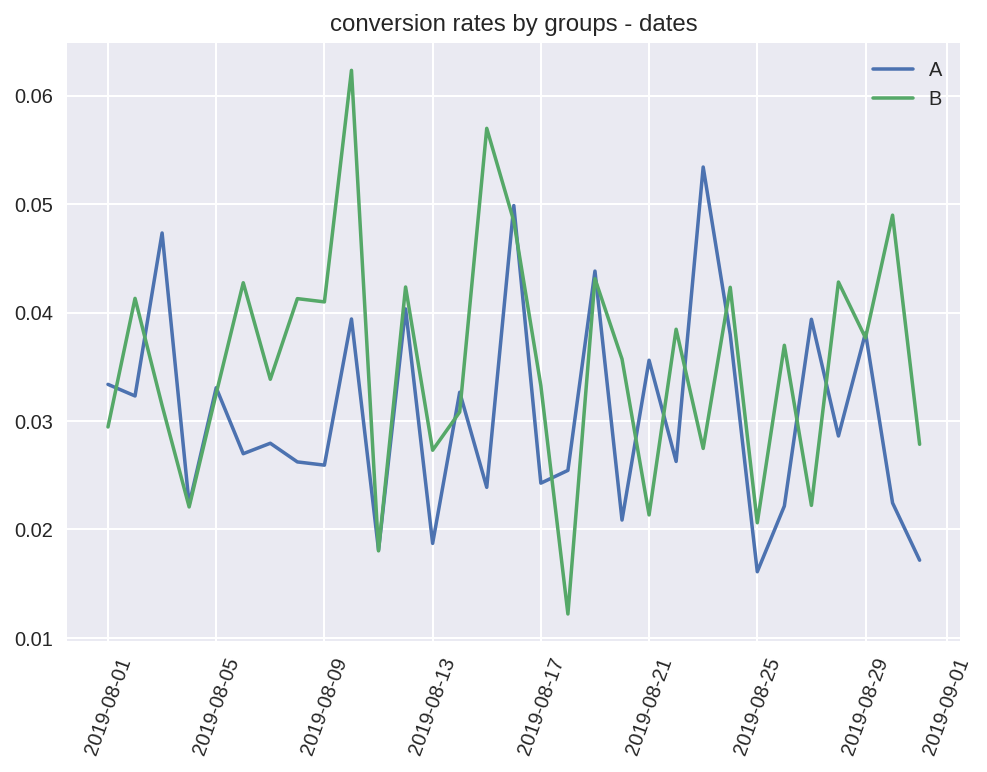

In [40]:
# graph withgout cumsum 
plt.plot(date, a_conversion, label='A')
plt.plot(date, b_conversion, label='B')
plt.legend()
plt.title('conversion rates by groups - dates')
plt.xlabel = ('dates')
plt.ylabel = ('converstion by group')
plt.xticks(rotation=70)
plt.show()

Text(0.5, 1.0, 'Relative gain in conversion by group B as opposed to A')

(array([18109., 18113., 18117., 18121., 18125., 18129., 18133., 18137.,
        18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

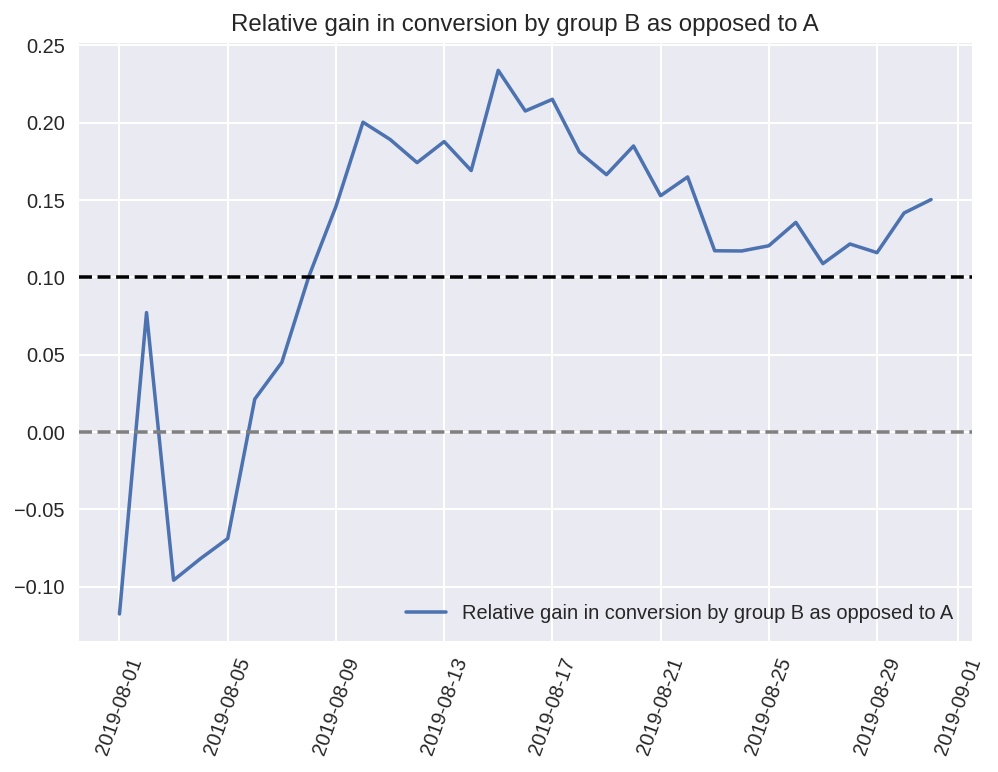

In [41]:
# difference between conversion rates by groups
plt.plot(date, b_conversion_cumsum / a_conversion_cumsum -1, label = 'Relative gain in conversion by group B as opposed to A')
plt.legend()

plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=0.1, color='black', linestyle='--')
plt.title('Relative gain in conversion by group B as opposed to A')
plt.xlabel = ('date')
plt.ylabel = ('gain in conversion')
plt.xticks(rotation=70)
plt.show()

<div class="alert alert-info"> <b>

    group B started with low conversion rate relatevly to group A conversion's, but about one week it went to be stable on high converstion rate if we compare it with the previous one.

# Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.

In [42]:
orders.head()

,transiction_id,visitors_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


      visitors_id  orders
1023   4256040402      11
591    2458001652      11
569    2378935119       9
487    2038680547       8
44      199603092       5
744    3062433592       5
55      237748145       5
917    3803269165       5
299    1230306981       5
897    3717692402       5


(array([937.,  64.,  17.,   3.,   6.,   0.,   0.,   1.,   1.,   2.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'orders by users')

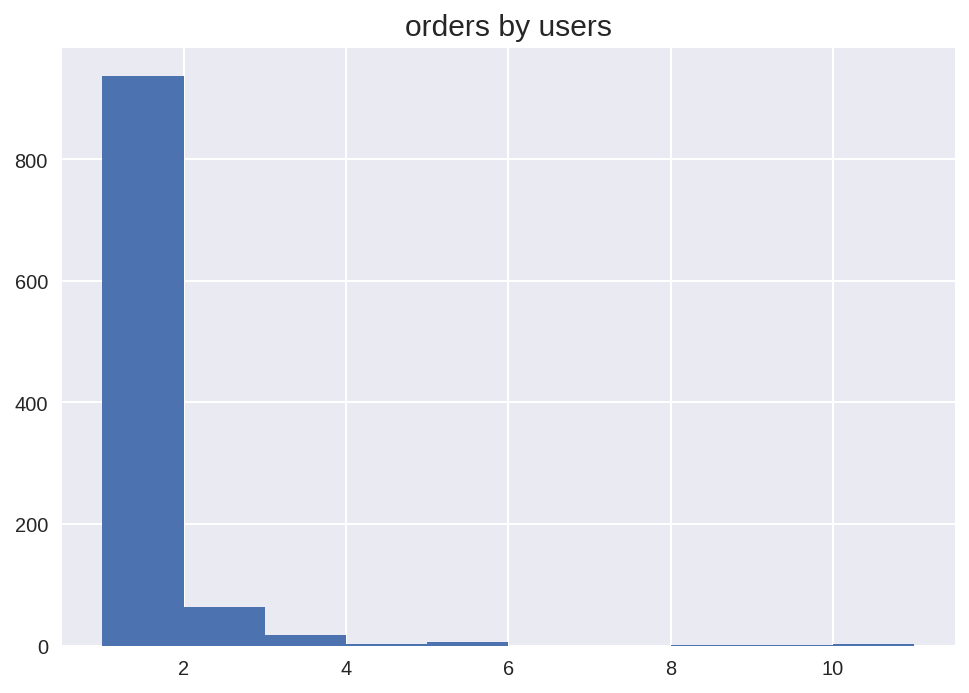

Text(0.5, 1.0, 'orders by users')

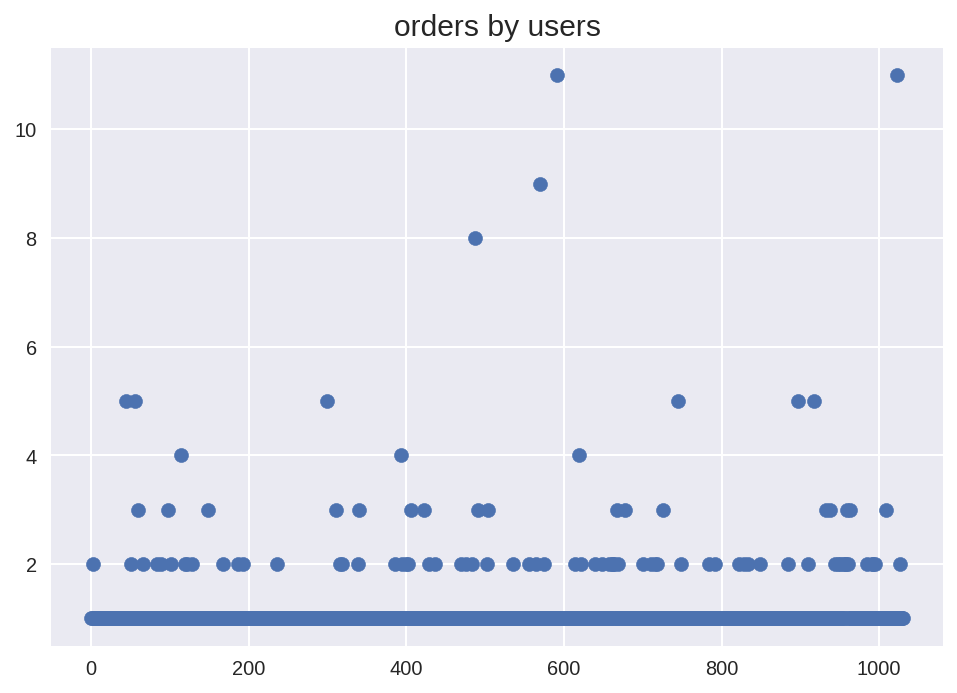

In [43]:
orders_users = orders.drop(['group', 'date', 'revenue'], axis=1).groupby('visitors_id', as_index=False).agg({'transiction_id':pd.Series.nunique})
orders_users.columns = ['visitors_id', 'orders']
print(orders_users.sort_values(by='orders', ascending=False).head(10))

plt.hist(orders_users['orders'])
plt.title('orders by users', fontsize=15)
plt.xlabel = ('orders')
plt.ylabel = ('users')
plt.show()

# plotting Scatter
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['orders'])
plt.title('orders by users', fontsize=15)
plt.xlabel = ('orders')
plt.ylabel = ('users')
plt.show()

<div class="alert alert-info"> <b>

    most of the users are placing only one orders from the online store, a bit users placing 2 or 3 orders in the website.
    it recommended to try attract these users to place more than one order or bring a new traffic.

# Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [44]:
# percentiles
print('percentiles: 90%, 95%, 99%', np.percentile(orders_users['orders'], [90, 95, 99]))

percentiles: 90%, 95%, 99% [1. 2. 4.]


<div class="alert alert-info"> <b>

    as I wrote before most of user are placing only one order

# Plot a scatter chart of order prices. Make conclusions and conjectures.

(array([1.195e+03, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([5.000000e+00, 1.996540e+03, 3.988080e+03, 5.979620e+03,
        7.971160e+03, 9.962700e+03, 1.195424e+04, 1.394578e+04,
        1.593732e+04, 1.792886e+04, 1.992040e+04]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'revenue by users')

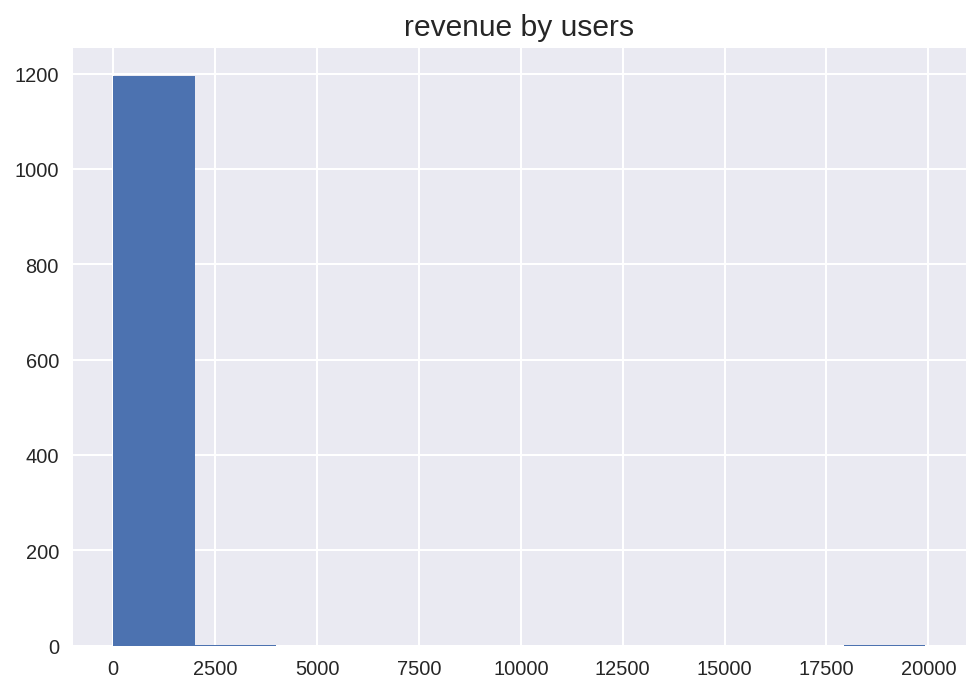

Text(0.5, 1.0, 'revenue by users')

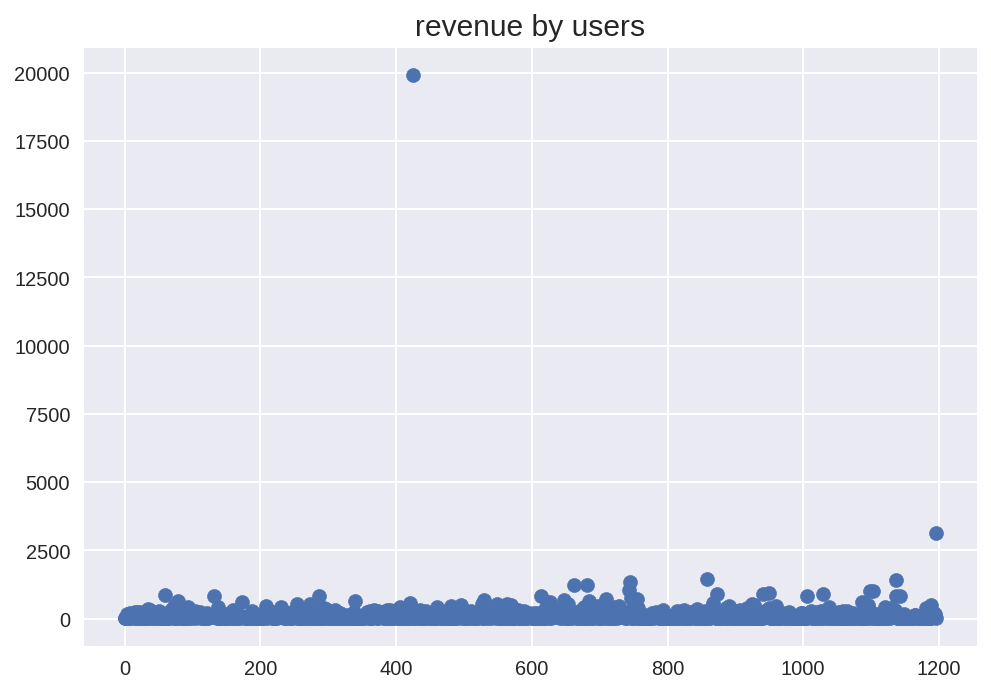

In [45]:
# order prices
plt.hist(orders['revenue'])
plt.title('revenue by users', fontsize=15)
plt.xlabel = ('revenue')
plt.ylabel = ('orders')
plt.show()

# plotting scatter
x_valuess = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_valuess, orders['revenue'])
plt.title('revenue by users', fontsize=15)
plt.xlabel = ('revenue')
plt.ylabel = ('orders')
plt.show()



<div class="alert alert-info"> <b>

    we can see that the revenue from orders is usually under 2500$, there are two unusuall orders with high price comparing to others, maybe it was a real orders not by wrong or something.

Text(0.5, 1.0, 'revenue by users')

(0.0, 1000.0)

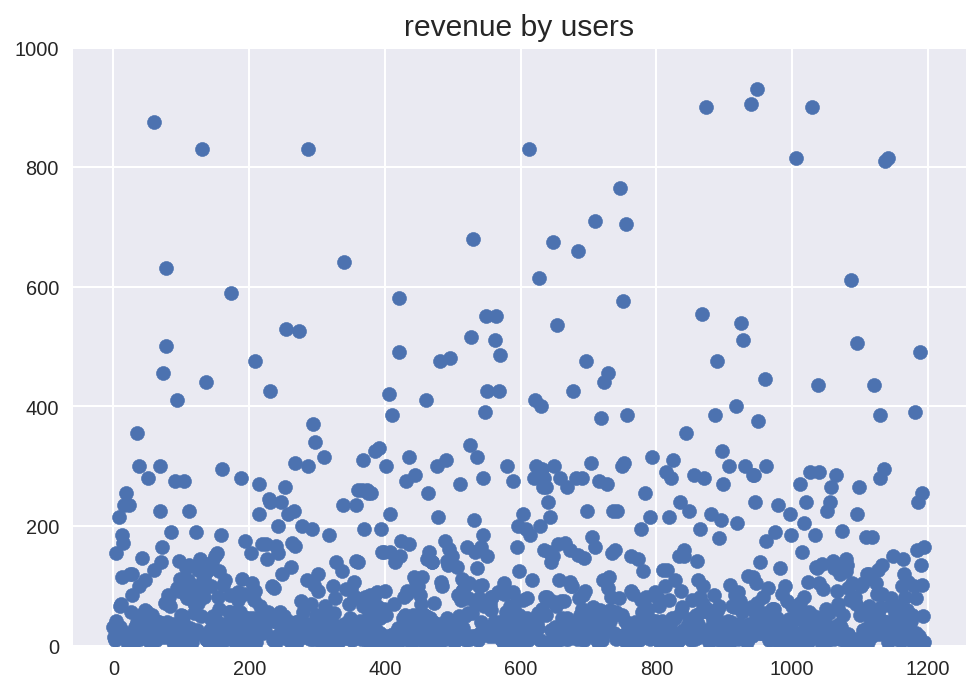

In [46]:
plt.scatter(x_valuess, orders['revenue'])
plt.title('revenue by users', fontsize=15)
plt.ylim(0, 1000)
plt.xlabel = ('revenue')
plt.ylabel = ('orders')
plt.show()



# Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.

In [49]:
# revenue perventiles
print('percentiles: 90%, 95%, 99%', np.percentile(orders['revenue'], [90, 95, 99]))
orders.head()

percentiles: 90%, 95%, 99% [282.48  435.54  900.904]


,transiction_id,visitors_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<div class="alert alert-info"> <b>

    90% of users brings revenue up to 280$, that mean only 10% of the users are bringing more than 280$. 
    95% of users brings up 414$ revenue of orders

# Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.

In [50]:
orders.head()

,transiction_id,visitors_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<div class="alert alert-info"> <b>
    
    null hypotheses: both groups A and B have the same conversion rate.
    alternative hypotheses: both groups A and B don't have the same conversion rate.

In [51]:
alpha = 0.05

a_orders_users = orders[orders['group'] == 'A'].groupby('visitors_id', as_index=False).agg({'transiction_id' : pd.Series.nunique})
a_orders_users.columns = ['visitors_id', 'transictions_id']

b_orders_users = orders[orders['group'] == 'B'].groupby('visitors_id', as_index=False).agg({'transiction_id' : pd.Series.nunique})
b_orders_users.columns = ['visitors_id', 'transictions_id']

a_sample = pd.concat([a_orders_users['transictions_id'], pd.Series(0, index=np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(a_orders_users['transictions_id'])),name='transictions_id')], axis=0)
b_sample = pd.concat([b_orders_users['transictions_id'], pd.Series(0, index=np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(b_orders_users['transictions_id'])),name='transictions_id')], axis=0)

print('relative gain:', "{0:.3f}".format(b_sample.mean()/a_sample.mean()-1))
results = st.mannwhitneyu(a_sample, b_sample)[1]
# print('p-value:', "{0:.3f}".format(results))
print('p-value:', results)
if(results<alpha):
    print('We reject the null hypotheses')
else:
    print('We can\'t reject the null hypotheses')

relative gain: 0.138
p-value: 0.016792355056752608
We reject the null hypotheses


<div class="alert alert-info"> <b>

    we rejected the hypotheses that both groups are the same, they are not.

# Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.

<div class="alert alert-info"> <b>
    
    null hypotheses: both groups A and B have the same average order size.
    alternative hypotheses: both groups A and B don't have the same average order size.

In [52]:
print('significance_of_difference: ', "{0:.3f}".format(orders[orders['group'] == 'B']['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean()-1))
result = st.mannwhitneyu(orders[orders['group'] =='A']['revenue'], orders[orders['group'] =='B']['revenue'])[1]
print('p-value:',result)
if(result<alpha):
    print('We reject the null hypotheses')
else:
    print('We can\'t reject the null hypotheses')

significance_of_difference:  0.252
p-value: 0.6915246773264736
We can't reject the null hypotheses


In [53]:
print('Group A orders average revenue:', "{0:.3f}".format(a_orders['revenue'].mean()))
print('Group B orders average revenue:', "{0:.3f}".format(b_orders['revenue'].mean()))

Group A orders average revenue: 115.897
Group B orders average revenue: 145.063


<div class="alert alert-info"> <b>

    the p-value is higher than the alpha, so we dont reject the null hypotheses that both groups are the same.

# Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.

In [54]:
users_alot_orders = pd.concat([a_orders_users[a_orders_users['transictions_id'] > 1]['visitors_id'], b_orders_users[b_orders_users['transictions_id']>1]['visitors_id']], axis=0)
users_expensive_orders = orders[orders['revenue'] > 414.275]['visitors_id']
abnormal_users = pd.concat([users_alot_orders, users_expensive_orders], axis=0).drop_duplicates().sort_values()
print(abnormal_users.head())
print(abnormal_users.shape)

568     113298937
1099    148427295
18      199603092
928     204675465
23      237748145
Name: visitors_id, dtype: int64
(115,)


<div class="alert alert-info"> <b>

    there are 86 users who are considered as anomalous users.

<div class="alert alert-info"> <b>
    
    null hypotheses: both groups A and B have the same conversion rate.
    alternative hypotheses: both groups A and B don't have the same conversion rate.

In [57]:
# checking data without the anomalous users
a_data_filtered = pd.concat([a_orders_users[np.logical_not(a_orders_users['visitors_id'].isin(abnormal_users))]['transictions_id'], pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(a_orders_users['transictions_id'])), name='transictions_id')], axis=0)
b_data_filtered = pd.concat([b_orders_users[np.logical_not(b_orders_users['visitors_id'].isin(abnormal_users))]['transictions_id'], pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(b_orders_users['transictions_id'])), name='transictions_id')], axis=0)


print('relative gain:', "{0:.3f}".format(b_data_filtered.mean()/a_data_filtered.mean()-1))
resultsss = st.mannwhitneyu(a_data_filtered, b_data_filtered)[1]

print('p-value:',resultsss)
if(resultsss<alpha):
    print('We reject the null hypotheses')
else:
    print('We can\'t reject the null hypotheses')

relative gain: 0.162
p-value: 0.019896639713829514
We reject the null hypotheses


<div class="alert alert-info"> <b>

    still there is a difference and we rejected the hypotheses that both groups are the same

# Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.

<div class="alert alert-info"> <b>
    
    null hypotheses: both groups A and B have the same average order size.
    alternative hypotheses: both groups A and B don't have the same average order size.

In [60]:
print('Significance difference:', "{0:.3f}".format(
    orders[np.logical_and(orders['group'] =='B', np.logical_not(orders['visitors_id'].isin(abnormal_users)))]['revenue'].mean()/
    orders[np.logical_and(orders['group'] =='A', np.logical_not(orders['visitors_id'].isin(abnormal_users)))]['revenue'].mean() - 1))
result = st.mannwhitneyu(orders[np.logical_and(orders['group'] =='A', np.logical_not(orders['visitors_id'].isin(abnormal_users)))]['revenue'],
                        orders[np.logical_and(orders['group'] =='B', np.logical_not(orders['visitors_id'].isin(abnormal_users)))]['revenue'])[1]

print('p-value:',result)
if(result<alpha):
    print('We reject the null hypotheses')
else:
    print('We can\'t reject the null hypotheses')

Significance difference: -0.022
p-value: 0.8147150604128901
We can't reject the null hypotheses


<div class="alert alert-info"> <b>

    the average of orders size in both groups has no significance different.

# Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.

<div class="alert alert-info"> <b>

    we can conclude that group B has higher cumulative revenue that group A, also by dates. 
    besides that it has higher conversion rates and bigger average order sizes, based on the raw data there is a difference in conversion rates between both groups and relative gain is 16% positive for group B.
    from the graphs I plotted before and tests made we can say that the model had stabalised and we can tell that we should stop the test and announce on group B as a winner of the test.

# Conclusion

<div class="alert alert-info"> <b>

    In the project I checked a hypotheses with A\B test and saw that the results are showing some differences.
    there were a group (B) has a better results than the other one and with the end of the tests we could say what should we do with the hypotheses.
    the hypotheses in the beggining of the project were prioritized by RICE.